<a href="https://colab.research.google.com/github/Maheswarisv/Data_Analysis_using_python/blob/Netflix_data_analysis/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [108]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os



Reading Data using pandas

In [109]:
df= pd.read_csv('/content/drive/MyDrive/data_analysis_using_python/netflix_titles_nov_2019.csv')

In [84]:
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


## **Data Cleaning**

1. Printing duplicate records

In [110]:
dups= df.duplicated(['title','country','type','release_year'])
df[dups]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


2. Removed duplicates

In [111]:
df=df.drop_duplicates(['title','country','type','release_year'])
dups= df.duplicated(['title','country','type','release_year'])
df[dups]
df_nodup=df


3. removed unused column( show_id)

In [112]:
df_rm_id=df_nodup.drop('show_id',axis=1)


In [113]:
df_rm_id_Ind=df_rm_id.reset_index()

In [114]:
df_rm_id_Ind

,index,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
...,...,...,...,...,...,...,...,...,...,...,...,...
5830,5832,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5831,5833,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5832,5834,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5833,5835,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show


4. create a new column shows the number of cast in each rows

In [115]:
df_rm_id_Ind['cast']=df_rm_id_Ind['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
df_rm_id_Ind['number_of_cast']=df_rm_id_Ind['cast'].apply(cast_counter)
df_rm_id_Ind['cast']=df_rm_id_Ind['cast'].replace('Unknown',np.nan)
df_castcount = df_rm_id_Ind


5. Missing rows in column rating is replaced by mode of column rating.

In [116]:
df_castcount['rating'] = df_castcount['rating'].fillna(df_castcount['rating'].mode()[0])
df_rtng = df_castcount 

6. Missing values in column date_added replaced by January 1 with year as mode of column release_year.

In [117]:
df_rtng['date_added'] = df_rtng['date_added'].fillna('January 1, {}'.format(str(df_rtng['release_year'].mode()[0])))

df_datefxd = df_rtng
df_datefxd


,index,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,number_of_cast
0,0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,8
1,1,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,1
2,2,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,8
3,3,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,9
4,4,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","January 1, 2018",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,5832,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,10
5831,5833,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,6
5832,5834,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,12
5833,5835,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,0


7. As we can not replace missing rows in column country by other countries, but we can use genre to
identify this country 
ex: replace missing rows by japan for Anime

i replace missing rows by japan for Anime genre.

In [118]:
for i , j in zip(df_datefxd['country'].values,df_datefxd.index):
  if i== np.nan:
    if('anime'in df_datefxd.loc[j,'Listed_in']) or ('Anime' in df_datefxd.loc[j,'Listed_in']):
      df_datefxd.loc[j,'country']='Japan'
    else:
      continue
  else:
    continue
df_cntryfxd = df_datefxd

8. Column date_added formated with numeric data.

In [119]:
import re
months={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
date_r =[]
for i in df_cntryfxd['date_added'].values:
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    # print(str3,str1,str2)
    date='{}-{}-{}'.format(str3[0],months[str1[0]],str2[0])
    date_r.append(date)
    

9. Created new column as Date_added_Cleaned from the formated data and removed column date_added.

In [120]:
df_cntryfxd['date_added_cleaned'] = date_r

In [121]:
df_dtclnd = df_cntryfxd.drop('date_added',axis=1)

10. column date_added_cleaned typecasted into datetime format.

In [122]:
df_dtclnd['date_added_cleaned'] = df_dtclnd['date_added_cleaned'].astype('datetime64[ns]')
df_Cleaned = df_dtclnd
df_Cleaned['date_added_cleaned'].dt.year.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008])

11. Repleced UR category by NR in column rating.

If a film has not been submitted for a rating or is an uncut version of a film that was submitted comes under NR or UR so i replaced them one value put it together under one category.

In [123]:
for i in df_Cleaned.index:
  if df_Cleaned.loc[i,'rating']== 'UR':
    df_Cleaned.loc[i,'rating']= 'NR'

## Exploratory Data Analysis


Below barplot,i used rating in x axis  and relative frequency of rating in y axis to figure it out the most observed rating catagory in TV-shows and movies.

**TV-MA category is the most observed rating category in TV-shows and movies**


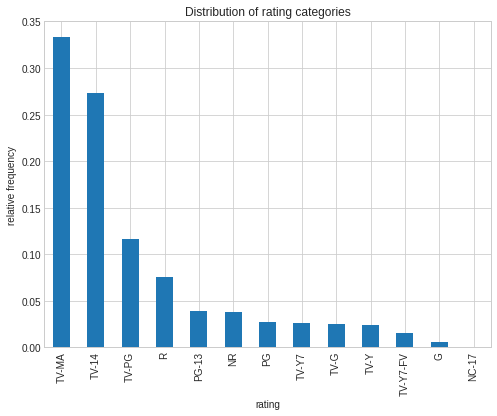

In [125]:
plt.figure(figsize=(8,6))
df_Cleaned['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

Below countplot, i used rating in x axis  and relative frequency of rating in y axis with respect to type of show(TV-show/movies).

**Movies is the majority category in each rating category on Netflix, except(TV-Y,TV-Y7,TV-Y7-FV)**



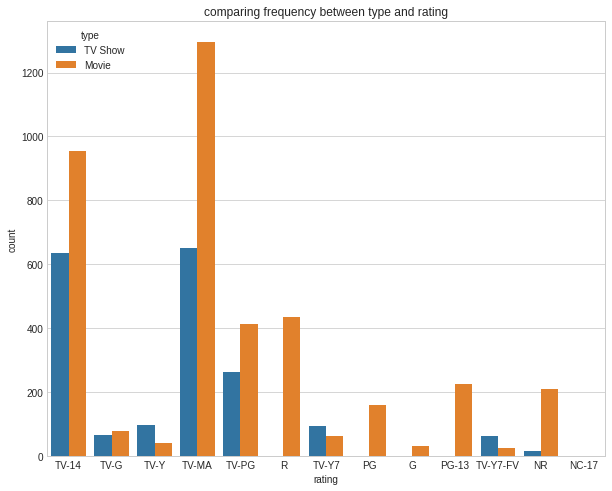

In [126]:
plt.figure(figsize=(10,8))
sb.countplot(x='rating',hue='type',data=df_Cleaned)
plt.title('comparing frequency between type and rating')
plt.show()

As the list of countries is huge in column country so im going to consider top 5 countries to do the plot.

In [127]:
df_Cleaned['country'].value_counts().sort_values(ascending=False)


United States                                                                                               1907
India                                                                                                        696
United Kingdom                                                                                               336
Japan                                                                                                        167
Canada                                                                                                       139
                                                                                                            ... 
United Arab Emirates, Jordan                                                                                   1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands       1
Canada, United Kingdom, Netherlands                                                             

Below is the countplot, I tried to find which country produce more TV-shows and Movies.I used country in x axis and the production count in y axis with respect to type created the plot.

 **United States produces the more Movies and TV-shows when compare to other countries. 
Japan and UK produces more TV-shows than movies.** 

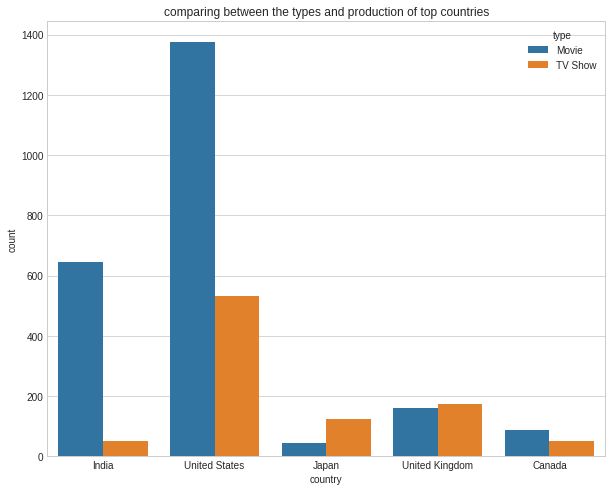

In [128]:
Top_productive_countries = df_Cleaned[(df_Cleaned['country']== 'United States')|
                                      (df_Cleaned['country']=='India')|(df_Cleaned['country']=='United Kingdom')|
                                      (df_Cleaned['country']=='Japan')|(df_Cleaned['country']=='Canada')]
plt.figure(figsize=(10,8))  
sb.countplot(x='country',hue='type',data= Top_productive_countries)   
plt.title('comparing between the types and production of top countries')  
plt.show()   

Here I am trying to infer the percentage of TV-shows and movies on the basis of year.


In [130]:
df_Cleaned['year_added']=df_Cleaned['date_added_cleaned'].dt.year
df_Cleaned.groupby('year_added')['type'].value_counts(normalize=True)*100


year_added  type   
2008        Movie       50.000000
            TV Show     50.000000
2009        Movie      100.000000
2010        Movie      100.000000
2011        Movie      100.000000
2012        Movie       57.142857
            TV Show     42.857143
2013        Movie       66.666667
            TV Show     33.333333
2014        Movie      100.000000
2015        Movie       78.378378
            TV Show     21.621622
2016        Movie       64.077670
            TV Show     35.922330
2017        Movie       77.111486
            TV Show     22.888514
2018        Movie       56.872247
            TV Show     43.127753
2019        Movie       74.158523
            TV Show     25.841477
Name: type, dtype: float64

I am trying to find Netflix trends. 
below is the countplot, I used the column year added in x axis and counts of TV-shows and movies in y axis. 

**from 2015 to 2018 netflix was focus on TV-shows still movies are in lead.**

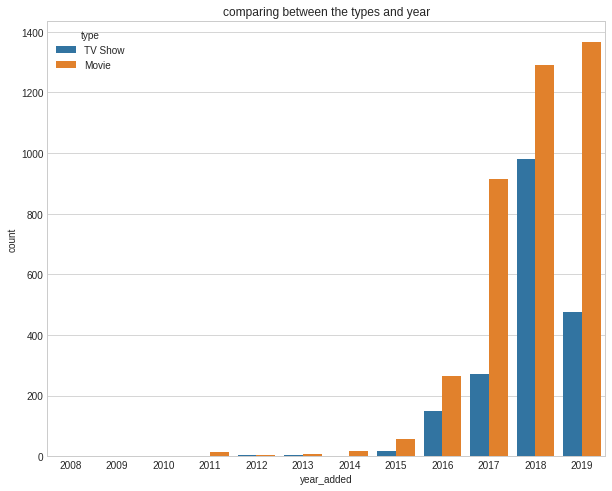

In [131]:
plt.figure(figsize=(10,8))  
sb.countplot(x='year_added',hue='type',data= df_Cleaned)   
plt.title('comparing between the types and year')  
plt.show()   

Trying to find is there any duplicate data under column title.

In [137]:
dups=df_Cleaned.duplicated(['title'])
# f_Cleaned[dups]['title']
for i in df_Cleaned[dups]['title'].values:
  print(df_Cleaned[df_Cleaned['title']==i][['title','type','release_year','country']])
  print ('-'*40)

     title   type  release_year        country
101  Drive  Movie          2011  United States
212  Drive  Movie          2019          India
----------------------------------------
       title     type  release_year      country
303   Tunnel  TV Show          2019          NaN
511   Tunnel  TV Show          2017  South Korea
4659  Tunnel    Movie          2016  South Korea
----------------------------------------
          title     type  release_year                        country
492   Supergirl    Movie          1984  United Kingdom, United States
1243  Supergirl  TV Show          2019                  United States
----------------------------------------
          title     type  release_year        country
474   Limitless    Movie          2017          India
1286  Limitless    Movie          2011  United States
5536  Limitless  TV Show          2016  United States
----------------------------------------
       title     type  release_year           country
154   Shadow    Mov

I am trying to find out the most productive year for Netlfix.

**2018 is the remarkable year for Netflix**

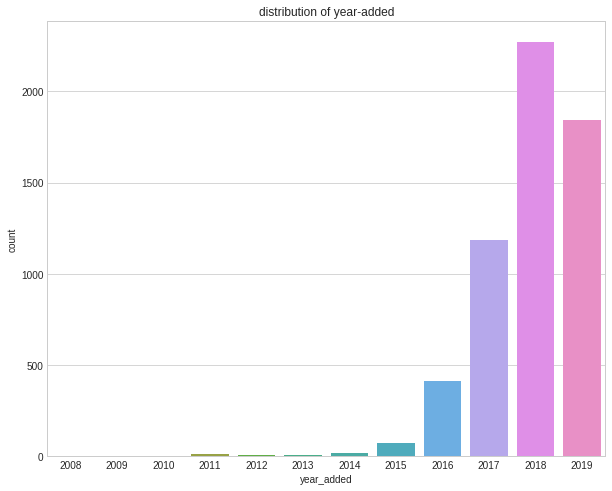

In [138]:
plt.figure(figsize=(10,8))
sb.countplot(x='year_added',data= df_Cleaned)
plt.title('distribution of year-added')
plt.show()